In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 3]

We analyze all.csv file and split per type group to analyze how the the distribution changed after preprocessing of outliers and filling values for no-close-date

In [101]:
allEvents = pd.read_csv("./../Data/all.csv")
allEvents.shape

(7484, 6)

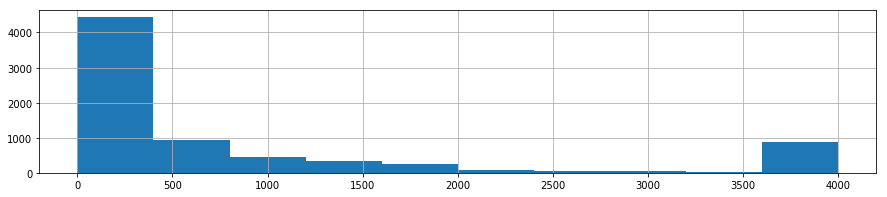

In [102]:
allEvents['Response Time'].hist()

(3058, 6)


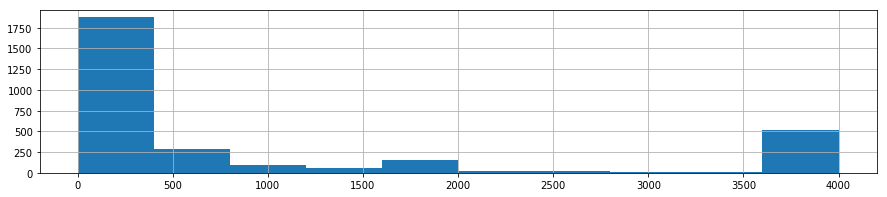

In [103]:
fireWithCloseDate = allEvents[(allEvents['Incident Type'].str.startswith("Fire") == True)]
fireWithCloseDate['Response Time'].hist()
print(fireWithCloseDate.shape)

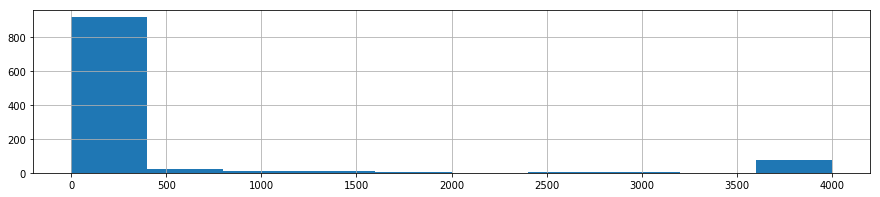

In [104]:
lawWithCloseDate = allEvents[(allEvents['Incident Type'].str.startswith("Law") == True)]
lawWithCloseDate['Response Time'].hist()

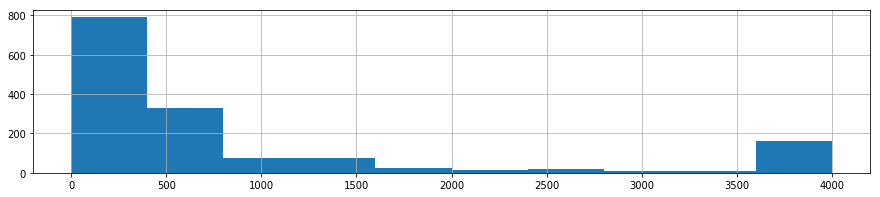

In [105]:
structWithCloseDate = allEvents[(allEvents['Incident Type'].str.startswith("Structural") == True)]
structWithCloseDate['Response Time'].hist()

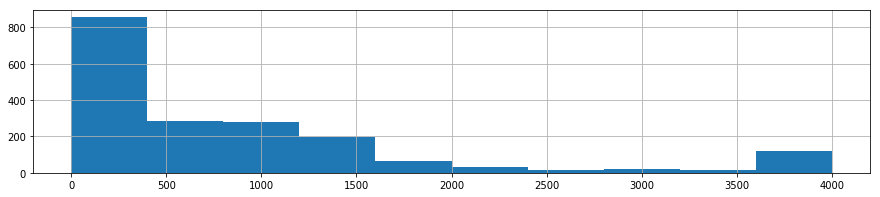

In [106]:
utilityWithCloseDate = allEvents[(allEvents['Incident Type'].str.startswith("Utility") == True)]
utilityWithCloseDate['Response Time'].hist()

Now, we will replace the no-close-date with the median within the type group and the outliers will be replaced with the 0.9 quantile value

In [44]:
df = pd.read_csv("./../dataprocess/Emergency_Response_Incidents.csv", error_bad_lines=False, index_col=False) #9018
clasify = 'Incident Type'
EMOriginalRT = df[(df[clasify].str.startswith("Fire") == True)|(df[clasify].str.startswith("Utility") == True)|(df[clasify].str.startswith("Law Enforcement") == True)|(df[clasify].str.startswith("Structural") == True)]

In [45]:
#### BEFORE DROPPING CLOSE DATE
fireOrigSize = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire") == True)]#2076
lawOrigSize = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law") == True)]
structOrigSize = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural") == True)]
utiOrigSize = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility") == True)]

print(EMOriginalRT.shape[0],fireOrigSize.shape[0], lawOrigSize.shape[0], structOrigSize.shape[0], utiOrigSize.shape[0])

7491 3059 1038 1507 1887


In [46]:
# CREATE RESPONSE TIME COLUMN

EMOriginalRT["Creation Date"]=pd.to_datetime(EMOriginalRT["Creation Date"])
EMOriginalRT = EMOriginalRT.sort_values(by=["Creation Date"])
EMOriginalRT["Response Time"] = (pd.to_datetime(EMOriginalRT["Closed Date"]) - pd.to_datetime(EMOriginalRT["Creation Date"])).dt.total_seconds()
EMOriginalRT["minute"] = 60
EMOriginalRT["Response Time"] = EMOriginalRT["Response Time"].div(EMOriginalRT["minute"])


### SAVE THIS WHEN REPLACEMENT IS DONE
#EMOriginal["Response Time"] = EMOriginal["Response Time"].astype('Int64')#.astype(int)

/home/gissella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
type(EMOriginalRT["Creation Date"])

pandas.core.series.Series

In [48]:
EMOriginalRT = EMOriginalRT.drop(['Location'], axis=1)
EMOriginalRT = EMOriginalRT.drop(['Borough'], axis=1)
#EMOriginalRT = EMOriginalRT.drop(['Creation Date'], axis=1)
#EMOriginalRT = EMOriginalRT.drop(['Closed Date'], axis=1)
EMOriginalRT = EMOriginalRT.drop(['Latitude'], axis=1)
EMOriginalRT = EMOriginalRT.drop(['Longitude'], axis=1)

In [49]:
EMOriginalRT.loc[EMOriginalRT["Response Time"]>100000]
#38

,Incident Type,Creation Date,Closed Date,Response Time,minute
3594,Fire-1st Alarm,2011-05-20 14:00:23,07/02/2013 12:53:27 PM,1.114493e+06,60
6534,Law Enforcement-Civil Unrest,2011-10-01 16:52:27,05/02/2012 05:21:53 AM,3.074694e+05,60
6412,Structural-Partial Collapse,2011-12-23 10:39:58,03/08/2012 12:11:21 PM,1.095314e+05,60
3756,Structural-Street Collapse,2012-07-01 08:53:18,05/26/2018 02:51:31 PM,3.103558e+06,60
3068,Utility-Manhole,2012-08-06 11:19:27,11/10/2012 02:06:52 PM,1.384074e+05,60
6819,Structural-Collapse,2013-06-08 04:47:23,08/22/2013 02:48:27 PM,1.086011e+05,60
4063,Fire-1st Alarm,2013-08-23 00:56:44,12/17/2013 07:40:58 PM,1.681642e+05,60
7093,Structural-Collapse,2013-08-30 14:32:59,12/17/2013 07:33:11 PM,1.572602e+05,60
7049,Fire-1st Alarm,2013-09-02 10:25:57,12/17/2013 07:30:43 PM,1.531848e+05,60
4062,Law Enforcement-Suspicious Device,2013-09-02 21:15:37,12/17/2013 07:29:27 PM,1.525338e+05,60


In [65]:
EMplotOutMiss = EMOriginalRT.copy()

In [66]:
EMplotOutMiss.loc[EMplotOutMiss["Response Time"]>100000] = 100000
#plt.xlabel('xlabel')
#plt.ylabel('ylabel')

In [60]:
EMplotOutMiss.plot(x=EMplotOutMiss["Creation Date"],y=EMplotOutMiss["Response Time"] , used_index=False)

KeyError: "None of [Index([2011-05-04 06:03:58, 2011-05-04 06:09:36, 2011-05-04 07:46:18,\n       2011-05-04 09:29:07, 2011-05-04 14:44:43, 2011-05-06 09:22:28,\n       2011-05-06 14:02:32, 2011-05-06 16:19:59, 2011-05-07 11:29:17,\n       2011-05-07 15:52:02,\n       ...\n       2019-12-13 19:50:41, 2019-12-15 07:20:39, 2019-12-15 13:12:15,\n       2019-12-15 13:55:25, 2019-12-15 16:53:34, 2019-12-16 07:44:11,\n       2019-12-16 12:15:59, 2019-12-16 23:03:33, 2019-12-17 11:38:47,\n       2019-12-17 20:19:18],\n      dtype='object', length=7491)] are in the [columns]"

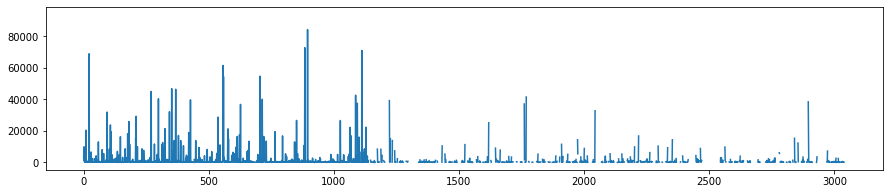

In [67]:
EMplotOutMiss[(EMplotOutMiss['Incident Type'].str.startswith("Fire") == True)]["Response Time"].plot(use_index=False)

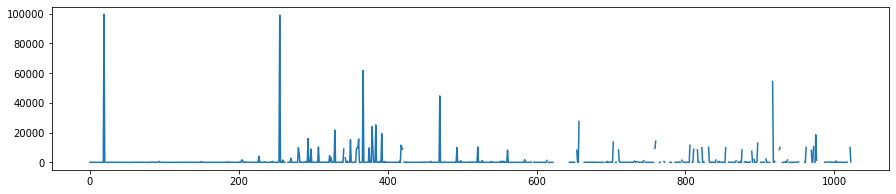

In [61]:
EMplotOutMiss[(EMplotOutMiss['Incident Type'].str.startswith("Law") == True)]["Response Time"].plot(use_index=False)

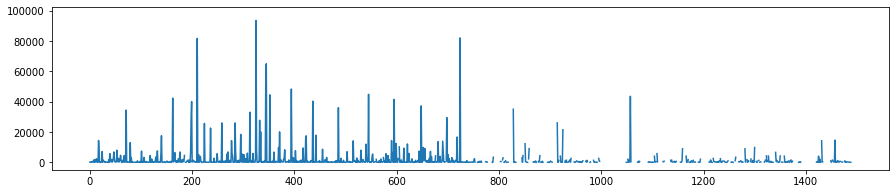

In [62]:
EMplotOutMiss[(EMplotOutMiss['Incident Type'].str.startswith("Structural") == True)]["Response Time"].plot(use_index=False)

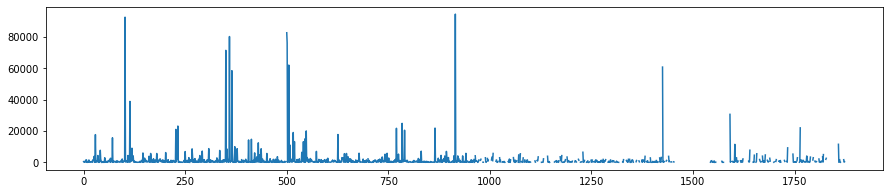

In [63]:
EMplotOutMiss[(EMplotOutMiss['Incident Type'].str.startswith("Utility") == True)]["Response Time"].plot(use_index=False)

In [68]:
#### GET ALL QUANTILE 90 FOR ALL GROUPS
q90Total = EMOriginalRT["Response Time"].quantile(.90)#4127.0
q90Fire = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire") == True)]["Response Time"].quantile(.90)
q90Law = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law") == True)]["Response Time"].quantile(.90)
q90Stru =  EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural") == True)]["Response Time"].quantile(.90)
q90Uti = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility") == True)]["Response Time"].quantile(.90)

print(q90Total,q90Fire, q90Law, q90Stru, q90Uti)
#Before replacing with median
#4127.716666666667 4931.008333333333 1145.776666666667 6234.1633333333175 2951.8366666666666

4078.860000000004 4931.008333333333 1145.776666666667 6234.1633333333175 2951.8366666666666


In [69]:
### REPLACE OUTLIER
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Fire")].max()['Response Time'])
EMOriginalRT["Response Time"].loc[(EMOriginalRT['Incident Type'].str.startswith("Fire") == True) & (EMOriginalRT["Response Time"]>q90Fire)]=q90Fire.astype(int)#.shape
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Fire")].max()['Response Time'])
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Law")].max()['Response Time'])
EMOriginalRT["Response Time"].loc[(EMOriginalRT['Incident Type'].str.startswith("Law") == True) & (EMOriginalRT["Response Time"]>q90Law)]=q90Law.astype(int)#.shape
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Law")].max()['Response Time'])
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Structural")].max()['Response Time'])
EMOriginalRT["Response Time"].loc[(EMOriginalRT['Incident Type'].str.startswith("Structural") == True) & (EMOriginalRT["Response Time"]>q90Stru)]=q90Stru.astype(int)#.shape
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Structural")].max()['Response Time'])
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Utility")].max()['Response Time'])
EMOriginalRT["Response Time"].loc[(EMOriginalRT['Incident Type'].str.startswith("Utility") == True) & (EMOriginalRT["Response Time"]>q90Uti)]=q90Uti.astype(int)#.shape
print(EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Utility")].max()['Response Time'])

1114493.066666667
4931.0
307469.43333333335
1145.0
3103558.216666667
6234.0
557333.2500000001
2951.0


/home/gbejarano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
dfFire = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire"))].dropna(subset=["Closed Date"]))
dfFire.drop(['Closed Date'], axis=1).to_csv('./../Data/DropCloseDate_Quant/fire.csv')

dfLaw = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law"))].dropna(subset=["Closed Date"]))
dfLaw.drop(['Closed Date'], axis=1).to_csv('./../Data/DropCloseDate_Quant/law.csv')

dfStru = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural"))].dropna(subset=["Closed Date"]))
dfStru.drop(['Closed Date'], axis=1).to_csv('./../Data/DropCloseDate_Quant/structural.csv')

dfUti = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility"))].dropna(subset=["Closed Date"]))
dfUti.drop(['Closed Date'], axis=1).to_csv('./../Data/DropCloseDate_Quant/utility.csv')

In [71]:
### GET MEDIANS
fireMedian = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire") == True)]["Response Time"].median()
lawMedian  = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law") == True)]["Response Time"].median()
struMedian = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural") == True)]["Response Time"].median()
utiMedian  = EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility") == True)]["Response Time"].median()

print(fireMedian, lawMedian, struMedian, utiMedian)

### REPLACE NO-CLOSE-DATE with MEDIAN
print(EMOriginalRT.shape,EMOriginalRT["Response Time"].isna().sum())
EMOriginalRT["Response Time"].loc[EMOriginalRT["Response Time"].isna() & EMOriginalRT['Incident Type'].str.startswith("Fire")] = int(fireMedian)#.astype(int)
print(EMOriginalRT.shape,EMOriginalRT["Response Time"].isna().sum())
EMOriginalRT["Response Time"].loc[EMOriginalRT["Response Time"].isna() & EMOriginalRT['Incident Type'].str.startswith("Law")] = int(lawMedian)#.astype(int)
print(EMOriginalRT.shape,EMOriginalRT["Response Time"].isna().sum())
EMOriginalRT["Response Time"].loc[EMOriginalRT["Response Time"].isna() & EMOriginalRT['Incident Type'].str.startswith("Structural")] = int(struMedian)#.astype(int)
print(EMOriginalRT.shape,EMOriginalRT["Response Time"].isna().sum())
EMOriginalRT["Response Time"].loc[EMOriginalRT["Response Time"].isna() & EMOriginalRT['Incident Type'].str.startswith("Utility")] = int(utiMedian)#.astype(int)
print(EMOriginalRT.shape,EMOriginalRT["Response Time"].isna().sum())

195.20833333333331 64.68333333333334 259.42500000000007 438.675
(7486, 4) 1889
(7486, 4) 908
(7486, 4) 785
(7486, 4) 436
(7486, 4) 0


In [72]:
print(EMOriginalRT["Response Time"].isna().sum(), EMOriginalRT["Response Time"].isna().sum())

0 0


In [36]:
EMOriginalRT[(EMOriginalRT['Response Time']>q90Fire) & (EMOriginalRT['Incident Type'].str.startswith('Fire'))].shape

(208, 3)

In [37]:
EMOriginalRT["Response Time"] = EMOriginalRT["Response Time"].astype(int)

In [38]:
#### REPLACE OUTLIERS
aux = EMOriginalRT['Incident Type'].str.startswith("Fire")
print(aux.isna().sum(), EMOriginalRT["Response Time"].isna().sum())
#print(EMOriginal[aux]["Response Time"])#.max(axis=0,skipna=True))
print(EMOriginalRT["Response Time"].max())

0 0
3103558


In [39]:
EMOriginalRT[EMOriginalRT['Incident Type'].str.startswith("Fire").isna()]

,Incident Type,Response Time,minute


1114493
4931
307469
1145
3103558
6234
557333
2951


And now we verify how the distributions are

In [41]:
EMOriginalRT["Response Time"].isna().sum()

0

In [42]:
EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire"))]["Response Time"].isna().sum()

0

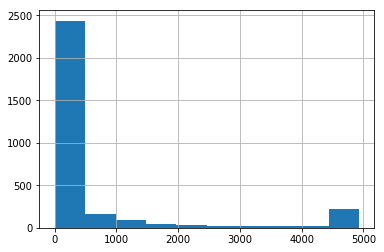

In [43]:
EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire"))]["Response Time"].hist()

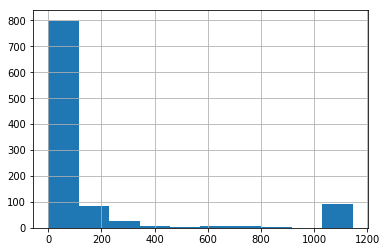

In [44]:
EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law"))]["Response Time"].hist()

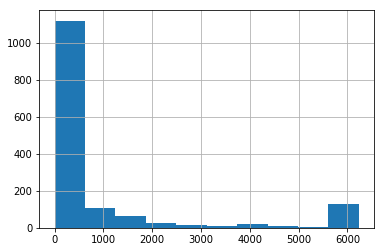

In [45]:
EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural"))]["Response Time"].hist()

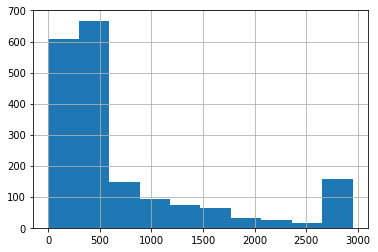

In [46]:
EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility"))]["Response Time"].hist()

In [47]:
dfFire = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Fire"))])
dfFire.to_csv('fire.csv')

dfLaw = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Law"))])
dfLaw.to_csv('law.csv')

dfStru = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Structural"))])
dfStru.to_csv('structural.csv')

dfUti = pd.DataFrame(EMOriginalRT[(EMOriginalRT['Incident Type'].str.startswith("Utility"))])
dfUti.to_csv('utility.csv')

And this is how it used to look by before doing any preprocessing

In [128]:
print("Before drop NA: ", EMOriginal.shape[0]) #63077
#EMDrop = EMOriginal.dropna(subset=["Closed Date"])
print("After drop NA: ", EMDrop.shape[0]) #48517 -> drop 23%

EMDrop["Creation Date"]=pd.to_datetime(EMDrop["Creation Date"])
EMDrop = EMDrop.sort_values(by=["Creation Date"])
EMDrop["Response Time"] = (pd.to_datetime(EMDrop["Closed Date"]) - pd.to_datetime(EMDrop["Creation Date"])).dt.total_seconds()
EMDrop["minute"] = 60
EMDrop["Response Time"] = EMDrop["Response Time"].div(EMDrop["minute"])
EMDrop["Response Time"] = EMDrop["Response Time"].astype(int)

Before drop NA:  9011
After drop NA:  6931


/home/gbejarano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


694


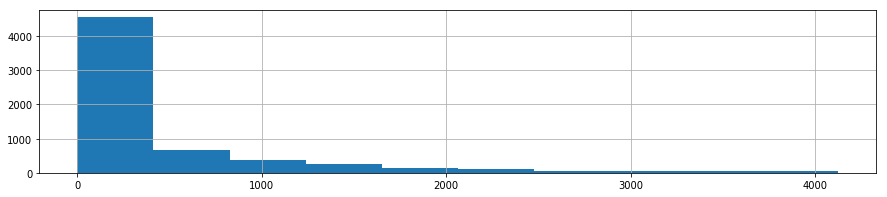

In [129]:
EMDrop["Response Time"][EMDrop["Response Time"]<4127.0].hist()
outTotal = EMDrop["Response Time"][EMDrop["Response Time"]>=4127.0]
print(outTotal.shape[0])#694

In [146]:
#### AFTER DROPPING CLOSE DATE
fireAfterDrop = EMDrop[(EMDrop['Incident Type'].str.startswith("Fire") == True)]#2076
lawAfterDrop = EMDrop[(EMDrop['Incident Type'].str.startswith("Law") == True)]
structAfterDrop = EMDrop[(EMDrop['Incident Type'].str.startswith("Structural") == True)]
utiAfterDrop = EMDrop[(EMDrop['Incident Type'].str.startswith("Utility") == True)]

print(fireAfterDrop.shape[0]/fireOrigSize.shape[0], lawAfterDrop.shape[0]/lawOrigSize.shape[0], structAfterDrop.shape[0]/structOrigSize.shape[0], utiAfterDrop.shape[0]/utiOrigSize.shape[0])

0.6790971540726202 0.8815028901734104 0.7684140676841407 0.7685774946921444


195.0
226


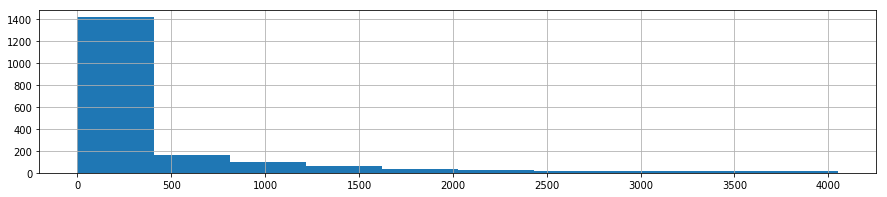

In [117]:
fireAfterDrop['Response Time'][fireAfterDrop["Response Time"]<4127.0].hist()
#Printing median and number of outliers
print(fireAfterDrop['Response Time'].median())
outFire = fireAfterDrop['Response Time'][fireAfterDrop["Response Time"]>=4127.0]
print(outFire.shape[0])

64.0
72


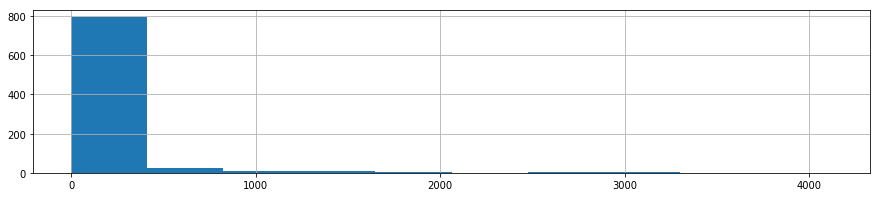

In [118]:
lawAfterDrop['Response Time'][lawAfterDrop["Response Time"]<4127.0].hist()
#Printing median and number of outliers
print(lawAfterDrop['Response Time'].median())
outLaw=lawAfterDrop['Response Time'][lawAfterDrop["Response Time"]>=4127.0]
print(outLaw.shape[0])

259.0
153


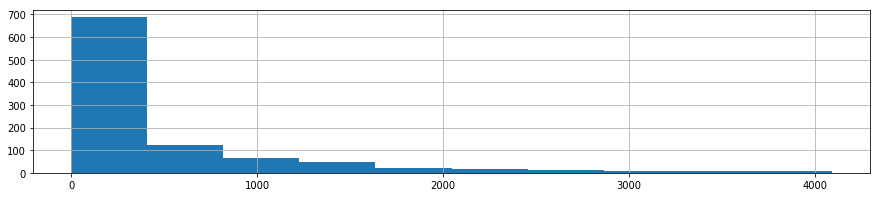

In [120]:
structAfterDrop['Response Time'][structAfterDrop["Response Time"]<4127.0].hist()
#Printing median and number of outliers
print(structAfterDrop['Response Time'].median())
outStru=structAfterDrop['Response Time'][structAfterDrop["Response Time"]>=4127.0]
print(outStru.shape[0])

438.0
103


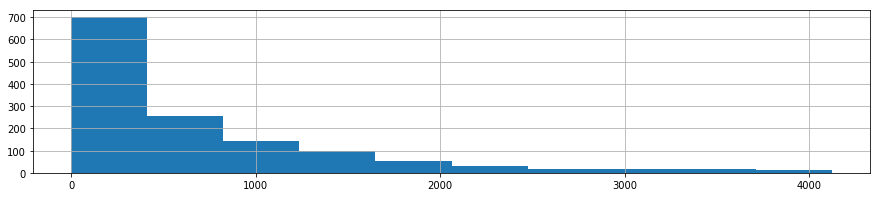

In [121]:
utiAfterDrop['Response Time'][utiAfterDrop["Response Time"]<4127.0].hist()
#Printing median and number of outliers
print(utiAfterDrop['Response Time'].median())
outUti=utiAfterDrop['Response Time'][utiAfterDrop["Response Time"]>=4127.0]
print(outUti.shape[0])

In [123]:
print(outFire.shape[0]/fireOrigSize.shape[0], outLaw.shape[0]/lawOrigSize.shape[0], outStru.shape[0]/structOrigSize.shape[0], outUti.shape[0]/utiOrigSize.shape[0])

0.07392868825646058 0.06936416184971098 0.10152621101526212 0.05467091295116773
